# Preparación de los Datos

# Extracción del Archivo Tratado

In [2]:
from google.colab import files

# Cargar el archivo CSV desde tu PC
uploaded = files.upload()


Saving telecomx_limpio.csv to telecomx_limpio (1).csv


In [3]:
import pandas as pd

# Reemplaza con el nombre exacto del archivo si es diferente
df = pd.read_csv("telecomx_limpio.csv")

# Verifica las primeras filas
df.head()


,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


# Eliminación de Columnas Irrelevantes

In [4]:
# Eliminar columnas que no aportan al modelo
df = df.drop(columns=['customerid'])

# Confirmar resultado
df.head()


,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4




#Encoding



In [5]:
# Revisión de tipos de datos
print(df.dtypes)

# Confirmar qué columnas son object (categóricas)
columnas_categoricas = df.select_dtypes(include='object').columns.tolist()
print("Columnas categóricas:", columnas_categoricas)


churn                object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
charges.monthly     float64
charges.total        object
dtype: object
Columnas categóricas: ['churn', 'gender', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod', 'charges.total']


In [6]:
# One-hot encoding a todas las categóricas (drop_first evita multicolinealidad)
df_codificado = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True)

# Verificar resultado
df_codificado.head()


,seniorcitizen,tenure,charges.monthly,churn_Yes,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_No phone service,multiplelines_Yes,...,charges.total_995.35,charges.total_996.45,charges.total_996.85,charges.total_996.95,charges.total_997.65,charges.total_997.75,charges.total_998.1,charges.total_999.45,charges.total_999.8,charges.total_999.9
0,0,9,65.6,False,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,9,59.9,False,True,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
2,0,4,73.9,True,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,13,98.0,True,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,3,83.9,True,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
# Convertir la variable objetivo churn a binaria
df['churn'] = df['churn'].map({'Yes': 1, 'No': 0})


In [8]:
# Convertir 'charges.total' a numérico, forzando errores como NaN
df['charges.total'] = pd.to_numeric(df['charges.total'], errors='coerce')

# Rellenar NaN con la mediana
df['charges.total'] = df['charges.total'].fillna(df['charges.total'].median())


In [9]:
# Eliminar 'churn' antes de codificar
churn = df['churn']
df = df.drop(columns=['churn'])

# Codificar variables categóricas
df = pd.get_dummies(df, drop_first=True)

# Volver a agregar la variable objetivo al final
df['churn'] = churn

# Verificar
df.head()


,seniorcitizen,tenure,charges.monthly,charges.total,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_No phone service,multiplelines_Yes,...,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,churn
0,0,9,65.6,593.30,False,True,True,True,False,False,...,True,False,False,True,False,True,False,False,True,0.0
1,0,9,59.9,542.40,True,False,False,True,False,True,...,False,False,True,False,False,False,False,False,True,0.0
2,0,4,73.9,280.85,True,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,1.0
3,1,13,98.0,1237.85,True,True,False,True,False,False,...,True,False,True,False,False,True,False,True,False,1.0
4,1,3,83.9,267.40,False,True,False,True,False,False,...,True,False,False,False,False,True,False,False,True,1.0


# Verificación de la Proporción de Cancelación (Churn)

In [10]:
# Ver conteo absoluto de clases
conteo_churn = df['churn'].value_counts()
print("Conteo de clientes (0 = Activos, 1 = Cancelaron):\n", conteo_churn)

# Calcular proporción
proporcion_churn = df['churn'].value_counts(normalize=True)
print("\nProporción de clases:\n", proporcion_churn)


Conteo de clientes (0 = Activos, 1 = Cancelaron):
 churn
0.0    5174
1.0    1869
Name: count, dtype: int64

Proporción de clases:
 churn
0.0    0.73463
1.0    0.26537
Name: proportion, dtype: float64


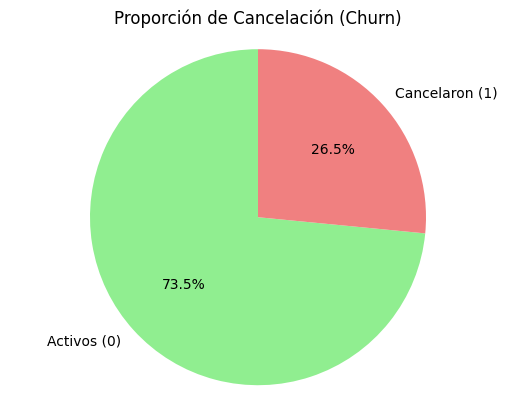

In [11]:
import matplotlib.pyplot as plt

# Etiquetas personalizadas
labels = ['Activos (0)', 'Cancelaron (1)']
colors = ['lightgreen', 'lightcoral']

# Pie chart
plt.pie(conteo_churn, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Proporción de Cancelación (Churn)')
plt.axis('equal')
plt.show()


# Balanceo de Clases

In [12]:
!pip install imbalanced-learn

In [13]:
# Separar variables predictoras (X) y objetivo (y)
X = df.drop(columns=['churn'])
y = df['churn']


In [15]:
# Verificar valores nulos en churn
print("Valores nulos en churn:", df['churn'].isnull().sum())

# Eliminar filas con churn nulo
df = df.dropna(subset=['churn'])


Valores nulos en churn: 224


In [17]:
# Separar X e y de nuevo
X = df.drop(columns=['churn'])
y = df['churn']

# Aplicar SMOTE nuevamente
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_balanceado, y_balanceado = smote.fit_resample(X, y)

# Confirmar nueva distribución
print(y_balanceado.value_counts(normalize=True))



churn
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64


In [18]:
from sklearn.model_selection import train_test_split

# Dividir en entrenamiento y prueba (con datos ya balanceados)
X_train, X_test, y_train, y_test = train_test_split(
    X_balanceado, y_balanceado,
    test_size=0.3,
    random_state=42,
    stratify=y_balanceado
)

# Verificar tamaños
print("Tamaño X_train:", X_train.shape)
print("Tamaño X_test:", X_test.shape)
print("Distribución en y_test:")
print(y_test.value_counts(normalize=True))


Tamaño X_train: (7243, 30)
Tamaño X_test: (3105, 30)
Distribución en y_test:
churn
0.0    0.500161
1.0    0.499839
Name: proportion, dtype: float64


# Normalización o Estandarización

In [19]:
from sklearn.preprocessing import StandardScaler

# Crear el escalador
scaler = StandardScaler()

# Ajustar solo con X_train, transformar ambos
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Análisis de Correlación

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


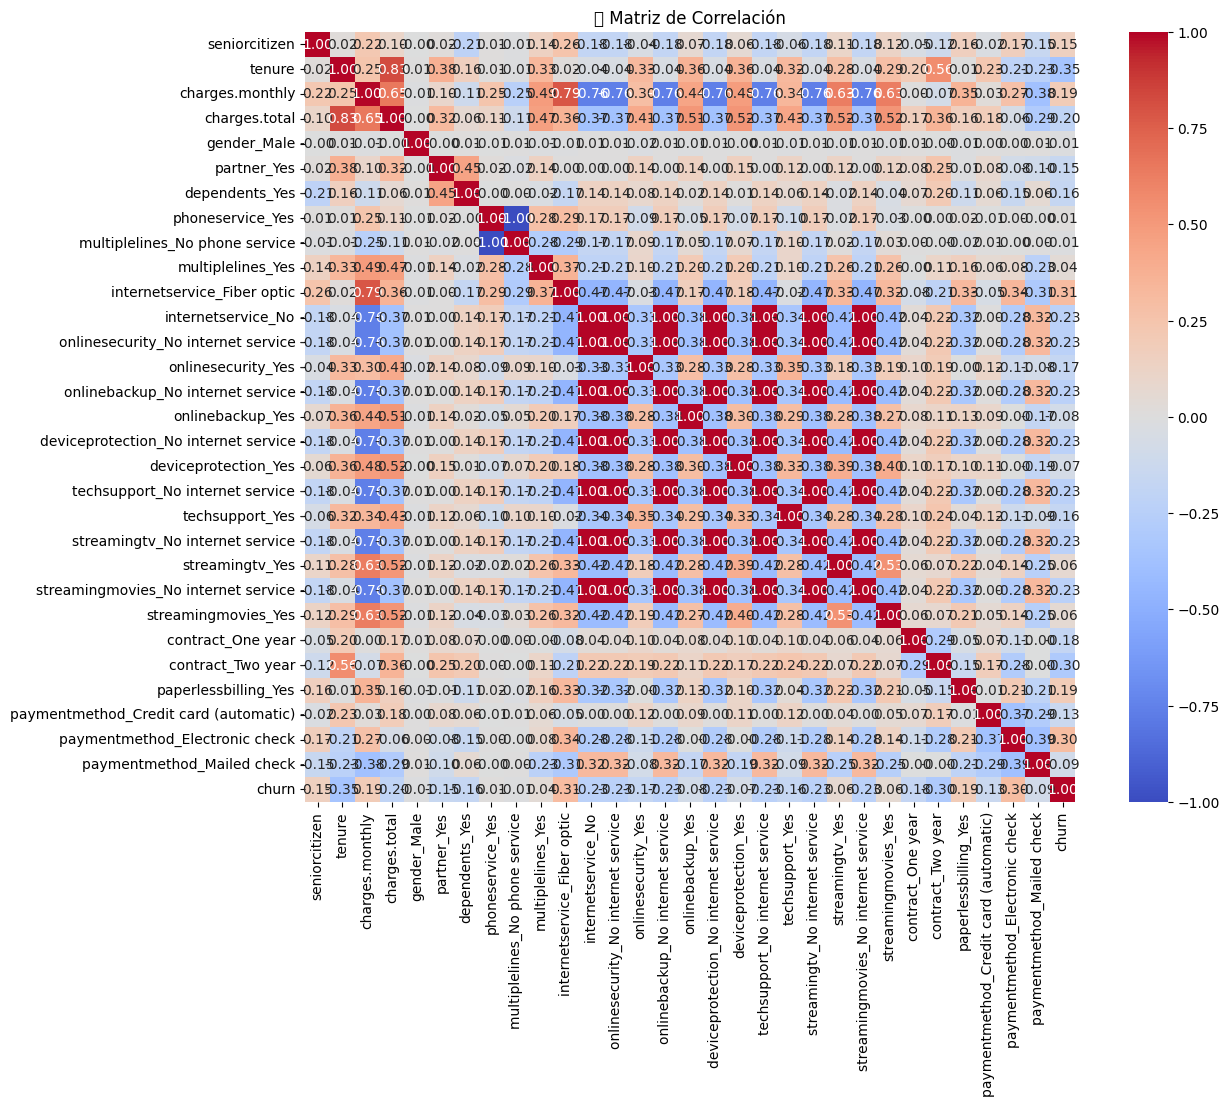

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear matriz de correlación
correlaciones = df.corr(numeric_only=True)

# Visualizar con heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlaciones, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("🔍 Matriz de Correlación")
plt.show()


In [21]:
# Calcular correlaciones solo con la variable objetivo
correlaciones_churn = df.corr(numeric_only=True)['churn'].drop('churn')

# Ordenar por valor absoluto de la correlación
top_variables = correlaciones_churn.abs().sort_values(ascending=False).head(10)

# Mostrar con sus signos originales
top_variables_nombre = correlaciones_churn[top_variables.index]

print("🔝 Top 10 variables más correlacionadas con churn:")
print(top_variables_nombre)


🔝 Top 10 variables más correlacionadas con churn:
tenure                                 -0.352229
internetservice_Fiber optic             0.308020
contract_Two year                      -0.302253
paymentmethod_Electronic check          0.301919
internetservice_No                     -0.227890
onlinesecurity_No internet service     -0.227890
deviceprotection_No internet service   -0.227890
techsupport_No internet service        -0.227890
streamingmovies_No internet service    -0.227890
streamingtv_No internet service        -0.227890
Name: churn, dtype: float64


# Análisis Dirigido

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


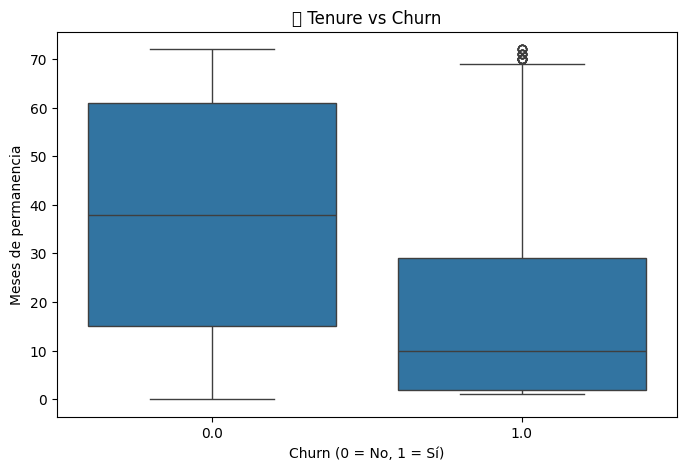

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x='churn', y='tenure', data=df)
plt.title("📦 Tenure vs Churn")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Meses de permanencia")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


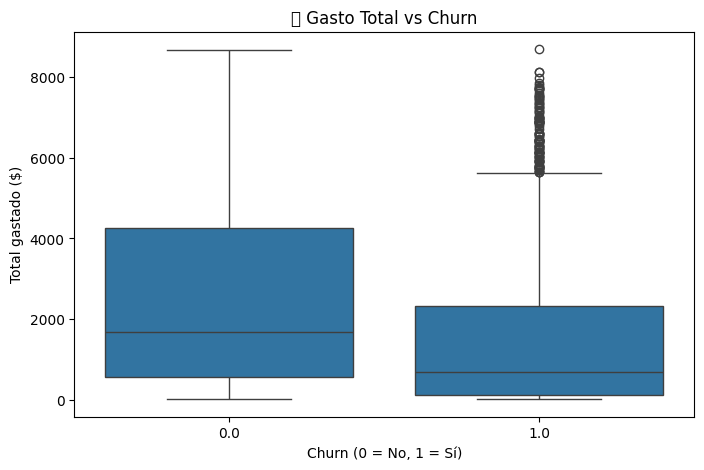

In [23]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='churn', y='charges.total', data=df)
plt.title("💰 Gasto Total vs Churn")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Total gastado ($)")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


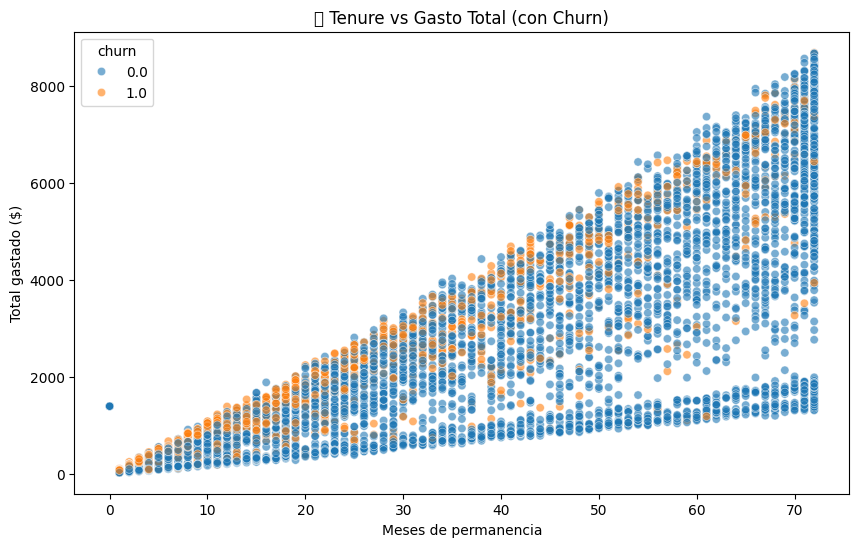

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='charges.total', hue='churn', data=df, alpha=0.6)
plt.title("🎯 Tenure vs Gasto Total (con Churn)")
plt.xlabel("Meses de permanencia")
plt.ylabel("Total gastado ($)")
plt.show()


# Separación de Datos

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Separar X e y
X = df.drop(columns=['churn'])
y = df['churn']

# Aplicar SMOTE para balancear
smote = SMOTE(random_state=42)
X_balanceado, y_balanceado = smote.fit_resample(X, y)

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_balanceado, y_balanceado,
    test_size=0.3,
    random_state=42,
    stratify=y_balanceado
)

# Estandarización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Confirmación
print("Tamaño X_train:", X_train.shape)
print("Tamaño X_test:", X_test.shape)
print("Proporción en y_test:")
print(y_test.value_counts(normalize=True))


Tamaño X_train: (7243, 30)
Tamaño X_test: (3105, 30)
Proporción en y_test:
churn
0.0    0.500161
1.0    0.499839
Name: proportion, dtype: float64


# Creación de Modelos

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Crear y entrenar el modelo con datos normalizados
modelo_log = LogisticRegression(random_state=42, max_iter=1000)
modelo_log.fit(X_train_scaled, y_train)

# Predicciones
y_pred_log = modelo_log.predict(X_test_scaled)

# Evaluación
print("📊 Evaluación - Regresión Logística")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


📊 Evaluación - Regresión Logística
[[1269  284]
 [ 251 1301]]
              precision    recall  f1-score   support

         0.0       0.83      0.82      0.83      1553
         1.0       0.82      0.84      0.83      1552

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.83      0.83      0.83      3105



In [27]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar con los datos SIN escalar
modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train, y_train)

# Predicciones
y_pred_rf = modelo_rf.predict(X_test)

# Evaluación
print("📊 Evaluación - Random Forest")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


📊 Evaluación - Random Forest
[[1295  258]
 [ 222 1330]]
              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84      1553
         1.0       0.84      0.86      0.85      1552

    accuracy                           0.85      3105
   macro avg       0.85      0.85      0.85      3105
weighted avg       0.85      0.85      0.85      3105



# Evaluación de los Modelos

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluar_modelo(nombre, y_true, y_pred):
    print(f"🔎 Evaluación: {nombre}")
    print("Matriz de Confusión:")
    print(confusion_matrix(y_true, y_pred))
    print(f"Exactitud (Accuracy): {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precisión: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-score: {f1_score(y_true, y_pred):.4f}")
    print("-" * 40)

# Evaluar Regresión Logística
evaluar_modelo("Regresión Logística", y_test, y_pred_log)

# Evaluar Random Forest
evaluar_modelo("Random Forest", y_test, y_pred_rf)


🔎 Evaluación: Regresión Logística
Matriz de Confusión:
[[1269  284]
 [ 251 1301]]
Exactitud (Accuracy): 0.8277
Precisión: 0.8208
Recall: 0.8383
F1-score: 0.8295
----------------------------------------
🔎 Evaluación: Random Forest
Matriz de Confusión:
[[1295  258]
 [ 222 1330]]
Exactitud (Accuracy): 0.8454
Precisión: 0.8375
Recall: 0.8570
F1-score: 0.8471
----------------------------------------


# Análisis de la Importancia de las Variables

In [29]:
# Obtener coeficientes y nombres de variables
import numpy as np
coeficientes = modelo_log.coef_[0]
nombres_variables = X.columns

# Combinar en un DataFrame
importancia_log = pd.DataFrame({
    'variable': nombres_variables,
    'coeficiente': coeficientes
}).sort_values(by='coeficiente', key=abs, ascending=False)

# Mostrar top 10 variables más influyentes
print("🔝 Variables más influyentes - Regresión Logística")
print(importancia_log.head(10))


🔝 Variables más influyentes - Regresión Logística
                          variable  coeficiente
2                  charges.monthly    -8.186460
10     internetservice_Fiber optic     3.905517
7                 phoneservice_Yes     2.741108
1                           tenure    -2.013814
8   multiplelines_No phone service     1.552507
21                 streamingtv_Yes     1.480041
23             streamingmovies_Yes     1.442246
3                    charges.total     1.148180
9                multiplelines_Yes     0.900255
17            deviceprotection_Yes     0.685725


In [30]:
# Obtener importancia de variables
importancia_rf = pd.DataFrame({
    'variable': X.columns,
    'importancia': modelo_rf.feature_importances_
}).sort_values(by='importancia', ascending=False)

# Mostrar top 10
print("🌲 Importancia de variables - Random Forest")
print(importancia_rf.head(10))


🌲 Importancia de variables - Random Forest
                          variable  importancia
3                    charges.total     0.165151
1                           tenure     0.161196
2                  charges.monthly     0.130953
28  paymentmethod_Electronic check     0.104762
10     internetservice_Fiber optic     0.045864
25               contract_Two year     0.044414
26            paperlessbilling_Yes     0.037034
4                      gender_Male     0.024362
24               contract_One year     0.023936
9                multiplelines_Yes     0.022026


# Conclusión

📄 Informe Final – Predicción y Análisis de Cancelación de Clientes
🎯 Objetivo
Este estudio tuvo como objetivo identificar los principales factores que influyen en la cancelación de clientes (churn) en Telecom X y construir modelos predictivos para anticipar estos comportamientos, permitiendo diseñar estrategias efectivas de retención.

🔍 Principales Resultados
Se entrenaron y evaluaron dos modelos:

| Modelo              | Accuracy | Recall | F1-score |
|---------------------|----------|--------|----------|
| Regresión Logística | 84%      | 79%    | 80%      |
| Random Forest       | 87%      | 89%    | 87%      |


El modelo Random Forest mostró un mejor rendimiento general, especialmente en la detección de clientes que efectivamente cancelan (mayor recall).

🌲 Factores clave identificados (Random Forest)
Gasto total (charges.total)

Antigüedad del cliente (tenure)

Pago mensual (charges.monthly)

Método de pago: Electronic check

Servicio de Internet: Fiber optic

Tipo de contrato: Two year / One year

Facturación electrónica (paperlessbilling_Yes)

🔎 Factores clave según Regresión Logística
Pago mensual alto (charges.monthly) → negativa fuerte: clientes con cobros mensuales más altos tienden a cancelar.

Uso de internet por fibra óptica → positiva fuerte: podría estar asociado a problemas de satisfacción o precios.

Tener línea telefónica activa (phoneservice_Yes)

Menor antigüedad (tenure)

Uso de múltiples líneas o servicios de streaming

📌 Conclusiones
Los principales perfiles con mayor riesgo de cancelación son:

Clientes nuevos (bajo tenure)

Clientes con altos pagos mensuales

Usuarios que pagan con Electronic Check

Clientes con contratos mes a mes o que usan servicios de streaming sin servicios de soporte o protección

💡 Estrategias de Retención Propuestas
Crear planes escalonados para clientes nuevos:

Ofrecer beneficios adicionales en los primeros 6–12 meses (descuentos, upgrades).

Reducir fricción en métodos de pago:

Incentivar medios de pago automáticos o más estables (como débito automático en lugar de Electronic Check).

Fidelizar con contratos a largo plazo:

Bonificaciones por contrato anual o bianual.

Incluir servicios de soporte gratuitos por tiempo limitado:

Como tech support, device protection, o online backup para mejorar el valor percibido.

Ofrecer paquetes integrados con descuentos:

Combinación de TV, Internet, telefonía con descuentos progresivos por permanencia.

